In [1]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [8]:
import joblib 

rf = joblib.load('../Boosts/SavedModels/Random_Forest.joblib');rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       criterion='entropy', max_features=9, min_samples_leaf=3,
                       min_samples_split=4)

In [9]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.load_model('../Boosts/SavedModels/XGBoost.json');xgb.fit(X_train, np.ravel(y_train))

c:\Users\ramaz\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:782: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn("Loading a native XGBoost model with Scikit-Learn interface.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)
combined_pred = np.vstack((xgb_pred, rf_pred)).T

In [11]:
from sklearn.ensemble import RandomForestClassifier

stacked_model = RandomForestClassifier(n_estimators=100, class_weight={0:2, 1:3})
stacked_model.fit(combined_pred, np.ravel(y_test))

RandomForestClassifier(class_weight={0: 2, 1: 3})

In [13]:
stacked_pred = stacked_model.predict(combined_pred)
accuracy = accuracy_score(y_test, stacked_pred)
print("Stacked model accuracy:", accuracy)

Stacked model accuracy: 0.8538664654847228


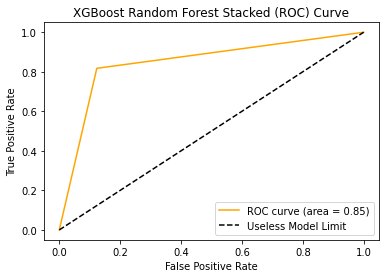

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, stacked_pred)
auc = roc_auc_score(y_test, stacked_pred)
class_report = pd.DataFrame(classification_report(y_test, stacked_pred, output_dict=True))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Random Forest Stacked (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
import joblib 

joblib.dump(stacked_model, "../Boosts/BoostedModels/rf_xgboost.joblib")

['../Boosts/BoostedModels/rf_xgboost.joblib']